# Examine transcription profiles

This notebook tries to examine why genes are found to be "most stable" and "least stable." This notebook also performs a small exploratory analysis to check that the genes we are calling "most stable" and "least stable" are _real_. If genes are "most stable" because they are always on then this is not as interesting. To examine this we will add statistics about the expression distribution to the transcriptional similarity scores matrix.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scripts import paths, utils, modules, annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Output files
pao1_out_filename = "pao1_core_similarity_expression_stats_spell.tsv"
pa14_out_filename = "pa14_core_similarity_expression_stats_spell.tsv"

In [3]:
# Load transcriptional similarity df
pao1_similarity_scores_filename = "pao1_similarity_scores_spell.tsv"
pa14_similarity_scores_filename = "pa14_similarity_scores_spell.tsv"

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [4]:
print(pao1_similarity_scores.shape)
pao1_similarity_scores.head()

(5349, 5)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label
PAO1 id,,,,,
PA0118,PA14_01440,0.290443,1.771504e-104,NaN,NaN
PA1859,PA14_40440,0.143328,5.986934e-26,NaN,NaN
PA3190,PA14_22980,0.257508,9.170620e-82,NaN,NaN
PA1009,PA14_51280,0.549950,0.000000e+00,NaN,NaN
PA1065,PA14_50620,0.329633,9.188709e-136,NaN,NaN


In [5]:
print(pa14_similarity_scores.shape)
pa14_similarity_scores.head()

(5347, 5)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label
PA14 id,,,,,
PA14_23690,PA3125,0.185094,2.030432e-42,NaN,NaN
PA14_11480,PA4049,0.327795,3.869112e-134,NaN,NaN
PA14_01150,PA0094,0.418704,4.989573e-226,NaN,NaN
PA14_11460,PA4051,0.541759,0.000000e+00,thiL,NaN
PA14_56780,PA4366,0.482227,1.451201e-309,sodB,NaN


### Add expression statistics

In [6]:
# Load expression data
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

In [7]:
# Expression matrices are sample x gene
pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", header=0, index_col=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", header=0, index_col=0)

In [8]:
pao1_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541571,5621.037929,902.172829,1380.825635,1811.863764,140.337996,508.725234,483.664878,666.605479,681.641693,77.687105,...,0.0,97.735390,471.134699,12.530178,87.711247,75.181069,77.687105,2288.010535,250.603564,0.000000
ERX541572,6323.898054,835.453446,1754.599065,1814.798699,190.876886,418.460865,321.554138,493.343336,666.600816,45.516796,...,0.0,80.755606,487.470201,10.277986,70.477619,46.985080,60.199633,2218.576726,199.686588,0.000000
ERX541573,4954.119979,893.818410,1984.802645,1752.146970,350.955170,362.785119,373.300630,465.311348,616.471815,42.062043,...,0.0,114.356179,782.091108,19.716583,153.789344,43.376482,106.469546,1474.800376,101.211790,0.000000
ERX541574,4603.356163,773.573295,2227.891090,1911.321096,311.809544,323.710671,435.581271,435.581271,506.988037,78.547442,...,0.0,152.334434,561.733224,21.422030,85.688119,38.083608,64.266089,2116.020491,78.547442,2.380226
ERX541575,4260.451254,875.408119,2140.106080,1788.361959,320.126671,288.509222,276.652679,577.018444,739.057871,57.306626,...,0.0,136.350249,677.799063,15.808725,195.632966,21.736996,118.565434,1650.035620,61.258807,0.000000


In [9]:
pao1_expression.tail()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
SRX9370139,1421.327077,868.803926,648.698325,1792.472885,279.488930,308.535124,460.220802,634.497964,628.043254,107.148181,...,494.430763,602.224415,1398.090122,115.539304,0.0,115.539304,125.221368,1278.032522,214.941833,0.0
SRX9370140,1050.041847,879.834756,599.931459,1375.570999,368.889894,282.815585,927.725724,830.973024,456.258553,268.577730,...,742.633602,575.015212,1761.287449,169.559916,0.0,100.635752,188.975174,652.352654,91.575298,0.0
SRX9370141,932.073339,725.802714,614.313762,1374.816207,405.794080,284.666314,828.938026,1014.967141,486.117532,278.883026,...,549.091119,577.364974,1766.473360,168.357956,0.0,99.601081,177.996770,617.205406,77.753102,0.0
SRX9370143,1139.520255,1618.100970,692.073972,2374.222919,370.944533,176.131936,467.906053,1236.481775,432.323844,192.143931,...,231.284361,322.908550,2585.047510,94.292855,0.0,124.537733,41.809096,653.823097,194.812596,0.0
SRX9370144,1104.211964,780.028588,642.341039,1352.170066,360.337656,280.496954,869.209145,875.536144,525.140915,237.714390,...,1323.246642,670.963177,1887.855979,189.508684,0.0,97.315270,191.617683,807.746869,90.988271,0.0


In [10]:
# Get distribution statistics
pao1_expression_stats = pao1_expression.describe()
pa14_expression_stats = pa14_expression.describe()

In [11]:
pao1_expression_stats.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,...,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2459.650175,1916.121116,1472.780671,3767.192060,329.802344,245.399360,545.909999,1021.002394,675.037844,95.929261,...,411.389615,406.417603,2604.042819,91.655462,70.669644,302.358460,582.205639,1293.968845,78.689777,29.057090
std,1412.289791,916.219787,1089.110143,2128.685286,156.924524,174.372615,620.204790,541.961454,423.012253,73.376876,...,762.209511,431.570503,1831.795868,99.340498,162.160897,284.710757,1445.780662,633.127723,152.666178,357.835928
min,709.720471,449.243152,116.779563,1040.226258,43.242041,24.514663,31.302632,142.120947,35.347272,0.000000,...,0.000000,0.000000,188.228651,0.000000,0.000000,12.916924,0.000000,360.233864,0.000000,0.000000
25%,1612.385572,1307.733060,850.098903,2395.321806,221.602679,154.940783,184.245421,644.291722,421.392418,53.407322,...,1.440581,132.251278,1460.384602,31.696058,33.610579,137.402403,86.327052,839.449680,25.323000,0.000000


In [12]:
pa14_expression_stats.head()

,PA14_55610,PA14_55600,PA14_55590,PA14_55580,PA14_55570,PA14_55560,PA14_55550,PA14_55540,PA14_55530,PA14_55520,...,PA14_19205,PA14_17675,PA14_67975,PA14_36345,PA14_43405,PA14_38825,PA14_24245,PA14_28895,PA14_55117,PA14_59845
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,206.540032,69.788982,32.851087,196.560846,60.244412,46.912747,31.619243,91.665771,43.645011,10.270828,...,68.036040,107.260396,1028.899552,429.070266,11.748006,110.770719,252.823371,503.394712,122.820510,556.549511
std,291.342881,124.709371,68.253542,351.254901,95.457294,98.813394,63.225701,355.791867,70.887510,31.252411,...,48.801143,75.330988,785.202273,729.047376,41.513573,209.784177,187.917164,391.738203,180.347681,655.818856
min,18.852248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,278.629446,0.000000,0.000000,0.000000,19.505917,38.150275,0.000000,0.000000
25%,69.237454,15.065182,5.430004,8.848371,15.519615,8.689894,5.810657,10.829144,11.406959,0.000000,...,33.991457,54.716898,791.239278,94.644354,0.000000,11.945786,146.125975,245.825218,55.085517,199.413714


In [13]:
# Format statistic data
pao1_expression_stats = pao1_expression_stats.T
pao1_expression_stats = pao1_expression_stats.drop(columns=["count"])
pao1_expression_stats = pao1_expression_stats.rename(
    columns={
        "mean": "mean expression",
        "std": "standard deviation expression",
        "25%": "25% expression",
        "50%": "50% expression",
        "75%": "75% expression",
        "min": "min expression",
        "max": "max expression",
    }
)
pao1_expression_stats["variance expression"] = (
    pao1_expression_stats["standard deviation expression"] ** 2
)
pao1_expression_stats["range expression"] = (
    pao1_expression_stats["max expression"] - pao1_expression_stats["min expression"]
)

In [14]:
pa14_expression_stats = pa14_expression_stats.T
pa14_expression_stats = pa14_expression_stats.drop(columns=["count"])
pa14_expression_stats = pa14_expression_stats.rename(
    columns={
        "mean": "mean expression",
        "std": "standard deviation expression",
        "25%": "25% expression",
        "50%": "50% expression",
        "75%": "75% expression",
        "min": "min expression",
        "max": "max expression",
    }
)
pa14_expression_stats["variance expression"] = (
    pa14_expression_stats["standard deviation expression"] ** 2
)
pa14_expression_stats["range expression"] = (
    pa14_expression_stats["max expression"] - pa14_expression_stats["min expression"]
)

In [15]:
pao1_expression_stats.head()

,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PA0001,2459.650175,1412.289791,709.720471,1612.385572,2124.297086,2790.223076,10689.526268,1.994562e+06,9979.805797
PA0002,1916.121116,916.219787,449.243152,1307.733060,1785.667299,2326.093863,8950.625430,8.394587e+05,8501.382278
PA0003,1472.780671,1089.110143,116.779563,850.098903,1237.743632,1792.765526,16007.986616,1.186161e+06,15891.207052
PA0004,3767.192060,2128.685286,1040.226258,2395.321806,3362.524302,4484.058607,18335.433260,4.531301e+06,17295.207001
PA0005,329.802344,156.924524,43.242041,221.602679,300.152951,402.348257,1099.069218,2.462531e+04,1055.827178


In [16]:
pa14_expression_stats.head()

,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PA14_55610,206.540032,291.342881,18.852248,69.237454,100.303020,194.184892,1653.247745,84880.674279,1634.395497
PA14_55600,69.788982,124.709371,0.000000,15.065182,27.888778,61.555825,938.391315,15552.427178,938.391315
PA14_55590,32.851087,68.253542,0.000000,5.430004,13.871988,29.810943,769.633731,4658.546039,769.633731
PA14_55580,196.560846,351.254901,0.000000,8.848371,49.576705,245.380939,2689.269638,123380.005774,2689.269638
PA14_55570,60.244412,95.457294,0.000000,15.519615,29.707353,61.984468,694.445120,9112.094941,694.445120


In [17]:
# Merge expression statistics with transcriptional similarity information
pao1_associations = pao1_similarity_scores.merge(
    pao1_expression_stats, left_index=True, right_index=True, how="left"
)
pa14_associations = pa14_similarity_scores.merge(
    pa14_expression_stats, left_index=True, right_index=True, how="left"
)

In [18]:
print(pao1_associations.shape)
pao1_associations.head()

(5349, 14)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PAO1 id,,,,,,,,,,,,,,
PA0118,PA14_01440,0.290443,1.771504e-104,NaN,NaN,84.379666,87.012773,0.000000,30.805250,56.083433,98.678794,743.594397,7.571223e+03,743.594397
PA1859,PA14_40440,0.143328,5.986934e-26,NaN,NaN,106.687908,91.482549,0.000000,50.280627,78.021322,118.345717,584.117921,8.369057e+03,584.117921
PA3190,PA14_22980,0.257508,9.170620e-82,NaN,NaN,2974.728597,4619.591491,0.000000,477.708748,1386.138060,3291.525419,41815.193043,2.134063e+07,41815.193043
PA1009,PA14_51280,0.549950,0.000000e+00,NaN,NaN,448.628362,387.755818,18.128903,238.075927,370.338444,543.930949,5826.229102,1.503546e+05,5808.100199
PA1065,PA14_50620,0.329633,9.188709e-136,NaN,NaN,105.604816,85.534956,0.000000,47.418993,82.907779,144.322724,707.184303,7.316229e+03,707.184303


In [19]:
print(pa14_associations.shape)
pa14_associations.head()

(5347, 14)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PA14 id,,,,,,,,,,,,,,
PA14_23690,PA3125,0.185094,2.030432e-42,NaN,NaN,85.595452,101.121951,0.000000,25.546082,51.093537,104.536787,709.117909,1.022565e+04,709.117909
PA14_11480,PA4049,0.327795,3.869112e-134,NaN,NaN,198.132451,121.601925,0.000000,125.119670,168.451503,230.506602,1084.278966,1.478703e+04,1084.278966
PA14_01150,PA0094,0.418704,4.989573e-226,NaN,NaN,105.290577,111.218985,0.000000,39.297006,75.807135,124.150007,860.205738,1.236966e+04,860.205738
PA14_11460,PA4051,0.541759,0.000000e+00,thiL,NaN,234.395250,177.782645,16.650153,110.935215,188.025557,300.223243,1008.676242,3.160667e+04,992.026089
PA14_56780,PA4366,0.482227,1.451201e-309,sodB,NaN,7781.835203,7633.163594,412.593023,3450.004296,5718.029115,8591.327252,72482.666616,5.826519e+07,72070.073593


In [20]:
# Save
pao1_associations.to_csv(pao1_out_filename, sep="\t")
pa14_associations.to_csv(pa14_out_filename, sep="\t")

## Examine expression distribution

One of the "most stable" core genes found were from the T6SS, which is surprising given this pathway allows for inter-strain warfare and so we’d expect genes within this pathway to vary across strains.

We will plot the distribution of these genes to make sure that the reason these T6SS genes are found to be stable is because all the genes are "off". Based on the plots below, this doesn't look to be the explanation for why T6SS genes are found to be stable across strains. Genes are expressed (> 1.0 log10 expression = 10 normalized counts)

We manually selected these genes.

### Example of most stable core gene

In [21]:
# tssC1 (T6SS) gene selected
# pao1_most_id = "PA0084"
# pa14_most_id = "PA14_01020"

# hcp1 (T6SS)
# pao1_most_id = "PA0085"
# pa14_most_id = "PA14_01030"

# tssF1 (T6SS)
# pao1_most_id = "PA0088"
# pa14_most_id = "PA14_01070"

# pscC (T3SS)
# pao1_most_id = "PA1716"
# pa14_most_id = "PA14_42350"

# pscF (T3SS)
pao1_most_id = "PA1719"
pa14_most_id = "PA14_42310"

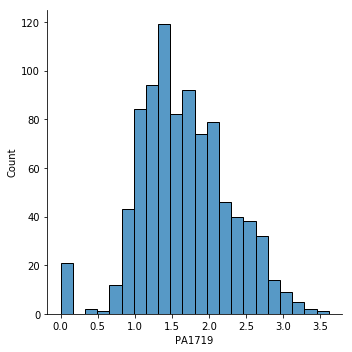

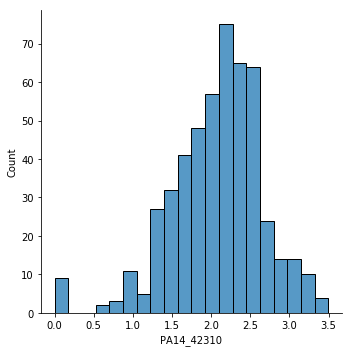

In [22]:
sns.displot(np.log10(pao1_expression[pao1_most_id] + 1))
sns.displot(np.log10(pa14_expression[pa14_most_id] + 1))

### Example of least stable core gene

In [23]:
# Least stable core gene
# pao1_least_id = "PA4685"
# pa14_least_id = "PA14_61980"

pao1_least_id = "PA2458"
pa14_least_id = "PA14_32830"

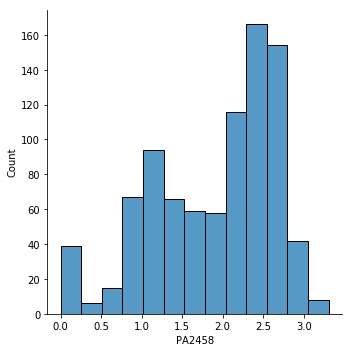

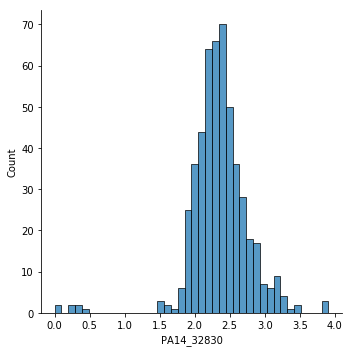

In [24]:
sns.displot(np.log10(pao1_expression[pao1_least_id] + 1))
sns.displot(np.log10(pa14_expression[pa14_least_id] + 1))